## get dataset ISCX-IDS-2012

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!!wget http://205.174.165.80/CICDataset/ISCX-IDS-2012/Dataset/labeled_flows_xml.zip

In [ ]:
!cp labeled_flows_xml.zip /content/drive/MyDrive

In [ ]:
!unzip /content/drive/MyDrive/labeled_flows_xml.zip /content/drive/MyDrive

Archive:  labeled_flows_xml.zip
  inflating: readme.txt              
  inflating: TestbedMonJun14Flows.xml  
  inflating: TestbedMonJun14Flows.xsd  
  inflating: TestbedSatJun12Flows.xml  
  inflating: TestbedSatJun12Flows.xsd  
  inflating: TestbedSunJun13Flows.xml  
  inflating: TestbedSunJun13Flows.xsd  
  inflating: TestbedThuJun17-1Flows.xml  
  inflating: TestbedThuJun17-1Flows.xsd  
  inflating: TestbedThuJun17-2Flows.xml  
  inflating: TestbedThuJun17-2Flows.xsd  
  inflating: TestbedThuJun17-3Flows.xml  
  inflating: TestbedThuJun17-3Flows.xsd  
  inflating: TestbedTueJun15-1Flows.xml  
  inflating: TestbedTueJun15-1Flows.xsd  
  inflating: TestbedTueJun15-2Flows.xml  
  inflating: TestbedTueJun15-2Flows.xsd  
  inflating: TestbedTueJun15-3Flows.xml  
  inflating: TestbedTueJun15-3Flows.xsd  
  inflating: TestbedWedJun16-1Flows.xml  
  inflating: TestbedWedJun16-1Flows.xsd  
  inflating: TestbedWedJun16-2Flows.xml  
  inflating: TestbedWedJun16-2Flows.xsd  
  inflating: Testb

In [ ]:
import requests

with open('TestbedWedJun16-3Flows.xsd', 'r') as f:
    data = f.read()

In [ ]:
import pickle
import os

def load_object(filename):
    with open(filename+".pkl", 'rb') as outp:
        loaded_object = pickle.load(outp)
    outp.close()
    return loaded_object

def save_object(obj, filename ):
  with open(filename+".pkl", 'wb') as outp:
    pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
  outp.close()

In [ ]:
labels = "appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePayloadAsBase64,destinationPayloadAsBase64,destinationPayloadAsUTF,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Tag"


In [ ]:
labels.split(',')

['appName',
 'totalSourceBytes',
 'totalDestinationBytes',
 'totalDestinationPackets',
 'totalSourcePackets',
 'sourcePayloadAsBase64',
 'destinationPayloadAsBase64',
 'destinationPayloadAsUTF',
 'direction',
 'sourceTCPFlagsDescription',
 'destinationTCPFlagsDescription',
 'source',
 'protocolName',
 'sourcePort',
 'destination',
 'destinationPort',
 'startDateTime',
 'stopDateTime',
 'Tag']

In [ ]:
columns = labels.split(',')

In [ ]:
# Importing the required libraries
import xml.etree.ElementTree as Xet
import pandas as pd

cols = columns
rows = []

# Parsing the XML file
xmlparse = Xet.parse('TestbedMonJun14Flows.xml')
root = xmlparse.getroot()
for i in root:
  for label in cols:
    print(label ,"::: " , i.find(label).text)
    rows.append({label: i.find(label).text})
	# name = i.find("name").text
	# phone = i.find("phone").text
	# email = i.find("email").text
	# date = i.find("date").text
	# country = i.find("country").text

	# rows.append({"name": name,
	# 			"phone": phone,
	# 			"email": email,
	# 			"date": date,
	# 			"country": country})

df = pd.DataFrame(rows, columns=cols)

# Writing dataframe to csv
# df.to_csv('output.csv')


FileNotFoundError: ignored

In [ ]:
!cat "/content/TestbedMonJun14Flows.xml"

## install libraries

In [1]:
!pip install river

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 4.1 MB/s 


# PWPAE: An Ensemble Framework for Concept Drift Adaptation in IoT Data Streams
This is the code for the paper entitled "**PWPAE: An Ensemble Framework for Concept Drift Adaptation in IoT Data Streams**" accepted in 2021 IEEE Global Communications Conference (GLOBECOM).  
Authors: Li Yang (lyang339@uwo.ca), Dimitrios Michael Manias (dmanias3@uwo.ca), and Abdallah Shami (Abdallah.Shami@uwo.ca)  
Organization: The Optimized Computing and Communications (OC2) Lab, ECE Department, Western University

L. Yang, D. M. Manias, and A. Shami, “PWPAE: An Ensemble Framework for Concept Drift Adaptation in IoT Data Streams,” in 2021 IEEE Glob. Commun. Conf. (GLOBECOM), Madrid, Spain, Dec. 2021.

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import time

In [3]:
import pickle
import os

def load_object(filename):
    with open(filename+".pkl", 'rb') as outp:
        loaded_object = pickle.load(outp)
    outp.close()
    return loaded_object

def save_object(obj, filename ):
  with open(filename+".pkl", 'wb') as outp:
    pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
  outp.close()

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Read dataset

In [5]:
concept_drift_data = [
"/content/drive/MyDrive/dataset/7gradualDrift.csv",
"/content/drive/MyDrive/dataset/7recurrentDrift.csv",
"/content/drive/MyDrive/dataset/7suddenDrift.csv",
"/content/drive/MyDrive/dataset/blip.csv",
"/content/drive/MyDrive/dataset/incrementalDrift.csv"
]

datasets = [
"/content/drive/MyDrive/dataset/sorted_KDD.csv",
"/content/drive/MyDrive/ORG_DATA/CSE-CIC2018.csv",
"/content/drive/MyDrive/dataset/sorted_ALLFLOWMETER_HIKARI2021.csv",
"/content/drive/MyDrive/ORG_DATA/CICIDS2017.csv"
]

dataset_rds = [
'/content/drive/MyDrive/CICIDS2017.csv',
'/content/drive/MyDrive/kddcup99_csv.csv',
'/content/drive/MyDrive/CSE-CIC2018.csv'
]


All_Data = [
    
"/content/drive/MyDrive/dataset/7gradualDrift.csv",
"/content/drive/MyDrive/dataset/7recurrentDrift.csv",
"/content/drive/MyDrive/dataset/7suddenDrift.csv",
"/content/drive/MyDrive/dataset/blip.csv",
"/content/drive/MyDrive/dataset/incrementalDrift.csv",
'/content/drive/MyDrive/CICIDS2017.csv',
'/content/drive/MyDrive/kddcup99_csv.csv',
'/content/drive/MyDrive/CSE-CIC2018.csv',
"/content/drive/MyDrive/ISCX2012.csv"
]

In [6]:
def read_dataset(path):
  
  # if (path.split('/')[-1].split(".")[0] == "CSE-CIC2018"):
  #   dataset = pd.read_csv(path,iterator= True, chunksize=400000)
  #   dataset = dataset.get_chunk(400000)
  #   dataset = dataset.drop(['14/02/2018 08:33:50'], axis=1)
  # elif (path.split('/')[-1].split(".")[0] == "sorted_ALLFLOWMETER_HIKARI2021"):
  #   dataset = pd.read_csv(path,iterator= True, chunksize=100000)
  #   dataset = dataset.get_chunk(100000)
  # else:
  dataset = pd.read_csv(path)
  dataset = dataset.sample(frac = 1 , random_state = 42)
  dataset.reset_index(inplace= True)

  if (path.split('/')[-1].split(".")[0] == "sorted_KDD"):
    dataset = dataset.drop(['5'] , axis = 1)
    
   # Replace infinite updated data with nan
  # dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
  
  # Drop rows with NaN
  # dataset.dropna(inplace=True)
  
  dataset.replace([np.inf, -np.inf], 0, inplace=True)
  dataset.replace([np.nan], 0, inplace=True)

  # d = d.sample(frac=1, random_state=42)
  # buffer = d.sample(n=5000)
  # d.reset_index(inplace=True)
  # d.replace([np.inf], 0, inplace=True)

  dataset.columns = list(range(len(dataset.columns)))
  target = len(dataset.columns)-1
  # print(dataset[target].value_counts())
  # print(target)

  if (path.split('/')[-1].split(".")[0] == "sorted_ALLFLOWMETER_HIKARI2021"):
    dataset[target] =  dataset[target].apply(lambda x: 1 if x == dataset[target][0] else 0)
  else:
    dataset[target] =  dataset[target].apply(lambda x: 0 if x == dataset[target][0] else 1)
  dataset[target].value_counts()

  # buffer0 = dataset[dataset[target]==0].sample(5000, random_state=42)
  # buffer1 = dataset[dataset[target]==1].sample(5000, random_state=42)
  # buffer = pd.concat([buffer0, buffer1],axis = 0)
  buffer = dataset.sample(10000 , random_state =42)
  # if (data.split('/')[-1].split(".")[0] == "CSE-CIC2018"):
  #   dataset = dataset.iloc[300000:400000]
  # else:
  #   dataset = dataset.iloc[0:100000]


  # buffer = dataset.sample(10000, random_state=42)
  # buffer[target].value_counts()
  return dataset ,target ,buffer

In [7]:
data = '/content/drive/MyDrive/dataset/7blip.csv'
data1 = "/content/drive/MyDrive/data (1)/IoT_2020_b_0.01_fs.csv"
# df = pd.read_csv(data)
# df = df.sample(n=None, frac=0.1, replace=False, weights=None, random_state=None, axis=0)
# df = df.sort_index()
dataset ,target ,buffer = read_dataset(concept_drift_data[0])
df = dataset

## Train-test split
10% training set, and 90% test set

In [ ]:
X = df.drop([target],axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.1, test_size = 0.9, shuffle=False,random_state = 0)

## Online Learning

Four base online learners for ensemble: 
* Adaptive Random Forest (ARF) model with ADWIN drift detector (ARF-ADWIN)
* Adaptive Random Forest (ARF) model with DDM drift detector (ARF-DDM)
* Streaming Random Patches (SRP) model with ADWIN drift detector (SRP-ADWIN)
* Streaming Random Patches (SRP) model with DDM drift detector (SRP-DDM)

Three other online learners for comparison:
* Extremely Fast Decision Tree (EFDT)
* Hoeffding Tree (HT)
* Leveraging Bagging (LB)

An ensemble online learner proposed in the paper:
* Performance Weighted Probability Averaging Ensemble (PWPAE)
   * It combines the 4 base online learners by weighting them based on their accuracy and classification probabilities

In [8]:
# Import the online learning metrics and algorithms from the River library
from river import metrics
from river import stream
from river import tree,neighbors,naive_bayes,ensemble,linear_model
from river.drift import DDM, ADWIN

In [9]:
# Define a generic adaptive learning function
# The argument "model" means an online adaptive learning algorithm
def adaptive_learning(model, X_train, y_train, X_test, y_test):
    metric = metrics.Accuracy() # Use accuracy as the metric
    i = 0 # count the number of evaluated data points
    t = [] # record the number of evaluated data points
    m = [] # record the real-time accuracy
    yt = [] # record all the true labels of the test set
    yp = [] # record all the predicted labels of the test set

    # Learn the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        model.learn_one(xi1,yi1) 

    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        y_pred= model.predict_one(xi)  # Predict the test sample
        model.learn_one(xi,yi) # Learn the test sample
        metric = metric.update(yi, y_pred) # Update the real-time accuracy
        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        i = i+1
    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp),4)*100)+"%")
    return t, m

### Base model learning

In [10]:
# Define a figure function that shows the real-time accuracy changes
def acc_fig(t, m, name , title):
    plt.rcParams.update({'font.size': 15})
    plt.figure(1,figsize=(10,6)) 
    sns.set_style("darkgrid")
    plt.clf() 
    plt.plot(t,m,'-b',label='Avg Accuracy: %.2f%%'%(m[-1]))

    plt.legend(loc='best')
    # plt.title(name+' on IoTID20 dataset', fontsize=15)
    plt.title(name, fontsize=15)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy (%)')
    plt.savefig('{}'.format(title))

    plt.draw()

Accuracy: 85.38%
Precision: 83.97%
Recall: 75.26%
F1-score: 79.38%
CPU times: user 1min 28s, sys: 338 ms, total: 1min 28s
Wall time: 1min 32s


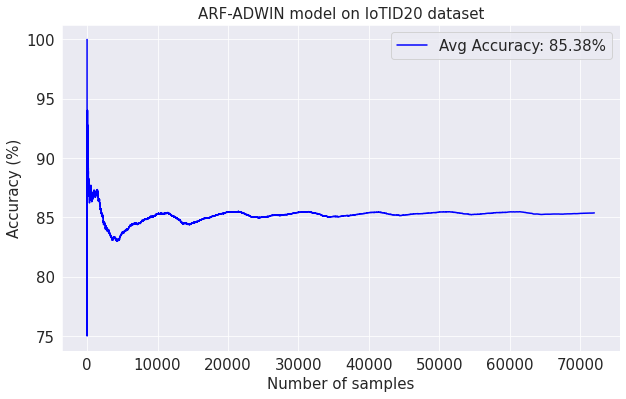

In [ ]:
%%time
# Use the Adaptive Random Forest (ARF) model with ADWIN drift detector
name1 = "ARF-ADWIN model"
model1 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = ADWIN()) # Define the model
t, m1 = adaptive_learning(model1, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m1, name1) # Draw the figure of how the real-time accuracy changes with the number of samples

Accuracy: 98.42%
Precision: 98.69%
Recall: 99.64%
F1-score: 99.17%
Wall time: 5.07 s


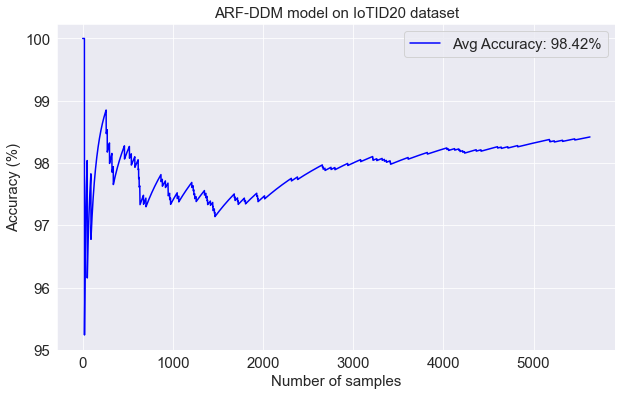

In [ ]:
%%time
# Use the Adaptive Random Forest (ARF) model with DDM drift detector
name2 = "ARF-DDM model"
model2 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = DDM()) # Define the model
t, m2 = adaptive_learning(model2, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m2, name2) # Draw the figure of how the real-time accuracy changes with the number of samples

Accuracy: 98.05%
Precision: 98.4%
Recall: 99.55000000000001%
F1-score: 98.97%
Wall time: 20.4 s


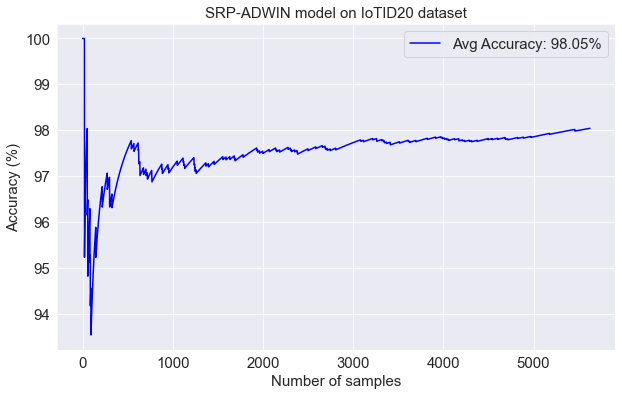

In [ ]:
%%time
# Use the Streaming Random Patches (SRP) model with ADWIN drift detector
name3 = "SRP-ADWIN model"
model3 = ensemble.SRPClassifier(n_models = 3, drift_detector = ADWIN()) # Define the model
t, m3 = adaptive_learning(model3, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m3, name3) # Draw the figure of how the real-time accuracy changes with the number of samples

Accuracy: 98.9%
Precision: 99.14%
Recall: 99.7%
F1-score: 99.42%
Wall time: 19.5 s


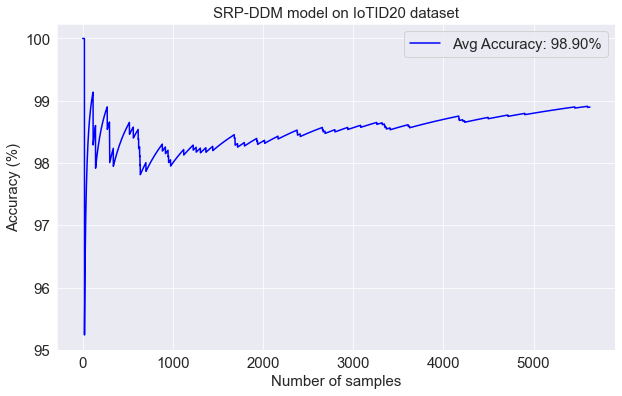

In [ ]:
%%time
# Use the Streaming Random Patches (SRP) model with DDM drift detector
name4 = "SRP-DDM model"
model4 = ensemble.SRPClassifier(n_models = 3, drift_detector = DDM()) # Define the model
t, m4 = adaptive_learning(model4, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m4, name4) # Draw the figure of how the real-time accuracy changes with the number of samples

### Comparison model learning

Accuracy: 97.19%
Precision: 97.53%
Recall: 99.55000000000001%
F1-score: 98.53%
Wall time: 1.85 s


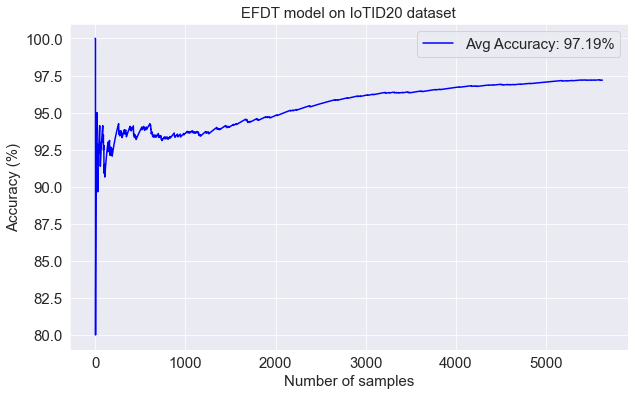

In [ ]:
%%time
# Use the Extremely Fast Decision Tree (EFDT) model 
name5 = "EFDT model"
model5 = tree.ExtremelyFastDecisionTreeClassifier() # Define the model
t, m5 = adaptive_learning(model5, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m5, name5) # Draw the figure of how the real-time accuracy changes with the number of samples

Accuracy: 95.45%
Precision: 95.91%
Recall: 99.42%
F1-score: 97.63%
Wall time: 1.9 s


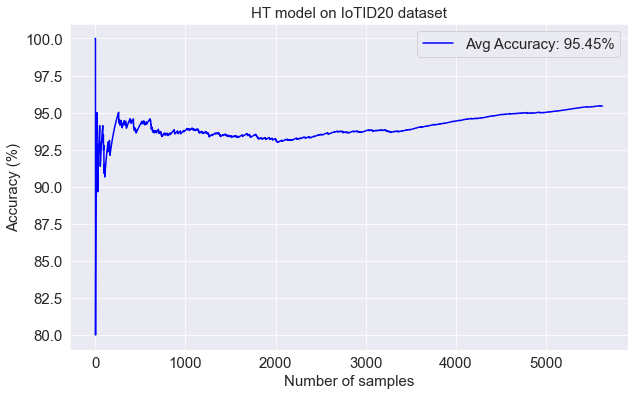

In [ ]:
%%time
# Use the Hoeffding Tree (HT) model 
name6 = "HT model"
model6 = tree.HoeffdingTreeClassifier() # Define the model
t, m6 = adaptive_learning(model6, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m6, name6) # Draw the figure of how the real-time accuracy changes with the number of samples

Accuracy: 97.65%
Precision: 98.03%
Recall: 99.51%
F1-score: 98.77%
Wall time: 25.4 s


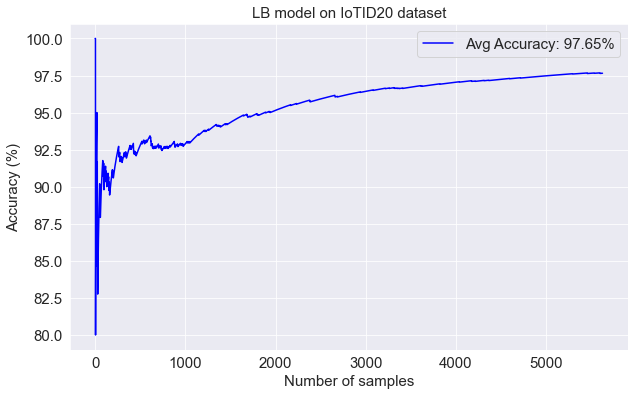

In [ ]:
%%time
# Use the Leveraging Bagging (LB) model 
name7 = "LB model"
model7 = ensemble.LeveragingBaggingClassifier(model=tree.HoeffdingTreeClassifier(),n_models=3) # Define the model
t, m7 = adaptive_learning(model7, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m7, name7) # Draw the figure of how the real-time accuracy changes with the number of samples

### PWPAE ensemble model learning

In [14]:
# Define the Performance Weighted Probability Averaging Ensemble (PWPAE) model
def PWPAE(X_train, y_train, X_test, y_test ,name_data,chunk_id):

    # path_directory = '/content/drive/MyDrive/Results of GP - PWPAE'
    # path = os.path.join(path_directory, "PWPAE__"+name_data )
    
    # if os.path.isdir(path):
    #   print(path)
    # else:
    #   os.mkdir(path)

    # Record the real-time accuracy of PWPAE and 4 base learners
    metric = metrics.Accuracy()
    metric1 = metrics.Accuracy()
    metric2 = metrics.Accuracy()
    metric3 = metrics.Accuracy()
    metric4 = metrics.Accuracy()

    i=0
    t = []
    m = []
    m1 = []
    m2 = []
    m3 = []
    m4 = []
    yt = []
    yp = []
    predictions = {}
    hat1 = ensemble.AdaptiveRandomForestClassifier(n_models=3) # ARF-ADWIN
    hat2 = ensemble.SRPClassifier(n_models=1, subspace_size=1.0) # SRP-ADWIN
    hat3 = ensemble.AdaptiveRandomForestClassifier(n_models=3,drift_detector=DDM(),warning_detector=DDM()) # ARF-DDM
    hat4 = ensemble.SRPClassifier(n_models=1,drift_detector=DDM(),warning_detector=DDM(), ) # SRP-DDM

    # The four base learners learn the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        # print(xi1.keys())
        hat1.learn_one(xi1,yi1)
        hat2.learn_one(xi1,yi1)
        hat3.learn_one(xi1,yi1)
        hat4.learn_one(xi1,yi1)

    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        # The four base learner predict the labels
        y_pred1= hat1.predict_one(xi) 
        y_prob1= hat1.predict_proba_one(xi) 
        hat1.learn_one(xi,yi)

        y_pred2= hat2.predict_one(xi) 
        y_prob2= hat2.predict_proba_one(xi)
        hat2.learn_one(xi,yi)

        y_pred3= hat3.predict_one(xi) 
        y_prob3= hat3.predict_proba_one(xi)
        hat3.learn_one(xi,yi)

        y_pred4= hat4.predict_one(xi) 
        y_prob4= hat4.predict_proba_one(xi)
        hat4.learn_one(xi,yi)
        
        # Record their real-time accuracy
        metric1 = metric1.update(yi, y_pred1)
        metric2 = metric2.update(yi, y_pred2)
        metric3 = metric3.update(yi, y_pred3)
        metric4 = metric4.update(yi, y_pred4)    

        # Calculate the real-time error rates of four base learners
        e1 = 1-metric1.get()
        e2 = 1-metric2.get()
        e3 = 1-metric3.get()
        e4 = 1-metric4.get()

        
        ep = 0.001 # The epsilon used to avoid dividing by 0
        # Calculate the weight of each base learner by the reciprocal of its real-time error rate
        ea = 1/(e1+ep)+1/(e2+ep)+1/(e3+ep)+1/(e4+ep)
        w1 = 1/(e1+ep)/ea
        w2 = 1/(e2+ep)/ea
        w3 = 1/(e3+ep)/ea
        w4 = 1/(e4+ep)/ea

        # Make ensemble predictions by the classification probabilities
        if  y_pred1 == 1:
            ypro10=1-y_prob1[1]
            ypro11=y_prob1[1]
        else:
            ypro10=y_prob1[0]
            ypro11=1-y_prob1[0]
        if  y_pred2 == 1:
            ypro20=1-y_prob2[1]
            ypro21=y_prob2[1]
        else:
            ypro20=y_prob2[0]
            ypro21=1-y_prob2[0]
        if  y_pred3 == 1:
            ypro30=1-y_prob3[1]
            ypro31=y_prob3[1]
        else:
            ypro30=y_prob3[0]
            ypro31=1-y_prob3[0]
        if  y_pred4 == 1:
            ypro40=1-y_prob4[1]
            ypro41=y_prob4[1]
        else:
            ypro40=y_prob4[0]
            ypro41=1-y_prob4[0]        

        # Calculate the final probabilities of classes 0 & 1 to make predictions
        y_prob_0 = w1*ypro10+w2*ypro20+w3*ypro30+w4*ypro40
        y_prob_1 = w1*ypro11+w2*ypro21+w3*ypro31+w4*ypro41

        if (y_prob_0>y_prob_1):
            y_pred = 0
            y_prob = y_prob_0
        else:
            y_pred = 1
            y_prob = y_prob_1
        
        # Update the real-time accuracy of the ensemble model
        metric = metric.update(yi, y_pred)

        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        
        i=i+1
    prediction = predictions['chunk_id_{}'.format(chunk_id + 1)] = {'y_true': yt, 'y_pred': yp}
    
    # patha = os.path.join(path,"chunk_id "+ str(chunk_id))
    
    # if os.path.isdir(patha):
    #   print(patha)
    # else:
    #   os.mkdir(patha)

    # path_p = os.path.join(patha, "chunk_id "+ str(chunk_id)+"_prediction")
    # save_object( prediction, path_p)



    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp),4)*100)+"%")
    return t, m ,prediction

Accuracy: 86.19%
Precision: 86.61999999999999%
Recall: 74.6%
F1-score: 80.17%
CPU times: user 11min 5s, sys: 2.46 s, total: 11min 8s
Wall time: 11min 12s


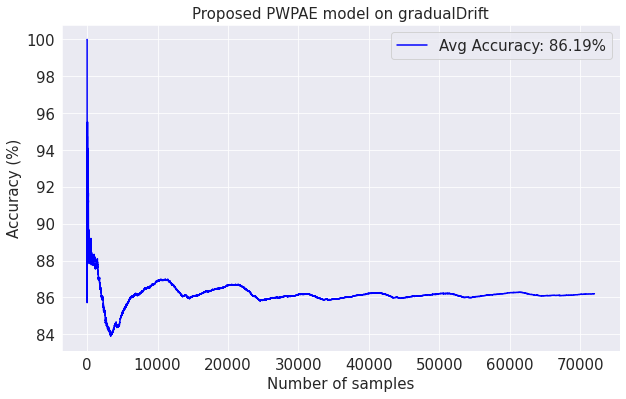

In [ ]:
%%time
# Use the Performance Weighted Probability Averaging Ensemble (PWPAE) model 
name = "Proposed PWPAE model"
data_name = ' on gradualDrift'
name = name+data_name
t, m = PWPAE(X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples

### Model comparison

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


def random_forest_feature_selection(X, y):
    """
    return best feature from X using random forest 
    """

    sel = SelectFromModel(RandomForestClassifier(n_estimators = 20))
    sel.fit(X, y)
    # print("count of features selected",np.count_nonzero(sel.get_support()))
    return sel.get_support()

In [13]:
def feature_evolving(evolving_matrix):
    """
    evolving_matrix : list of random list
    """
    random_index = np.random.randint(0, len(evolving_matrix), 1)[0]
    return evolving_matrix[random_index]


In [ ]:
dataset ,target ,buffer = read_dataset('/content/drive/MyDrive/TestbedMonJun14Flows.csv')

Normal    167604
Attack      3776
Name: 19, dtype: int64
19


In [ ]:
dataset

0                   1      2     3   4    5   \
0            0         Unknown_UDP  16076     0   0  178   
1            1   HTTPImageTransfer    384     0   0    6   
2            2                 DNS    171   642   4    2   
3            3   HTTPImageTransfer    384     0   0    6   
4            4   HTTPImageTransfer    186   128   2    2   
...        ...                 ...    ...   ...  ..  ...   
171375  171375  WindowsFileSharing   2759  2444  16   17   
171376  171376         Unknown_TCP     66    81   1    1   
171377  171377         Unknown_UDP    113   104   1    1   
171378  171378         Unknown_TCP     66    81   1    1   
171379  171379         Unknown_TCP     66    81   1    1   

                                                       6   \
0                                                       0   
1                                                       0   
2                                                       0   
3                                                       0   
4                                                       0   
...                                                   ...   
171375  gQAARCBGRUVGRkRGRUVDRUZFRURBRERDQUNBQ0FDQUNBQ0...   
171376                                                  0   
171377  ZDE6YWQyOmlkMjA6rw5wzJNL+wP0x18OUoTf94/c28FlMT...   
171378                                                  0   
171379                                                  0   

                                                       7   \
0                                                       0   
1                                                       0   
2                                                       0   
3                                                       0   
4                                                       0   
...                                                   ...   
171375  ggAAAAAAAFX/U01CcgAAAACYU8gAAAAAAAAAAAAAAAAAAP...   
171376                   R28gYXdheSwgd2UncmUgbm90IGhvbWU=   
171377  ZDE6cmQyOmlkMjA6dkyhzNqhf05DkE3Ih4qYDY787HRlMT...   
171378                   R28gYXdheSwgd2UncmUgbm90IGhvbWU=   
171379                   R28gYXdheSwgd2UncmUgbm90IGhvbWU=   

                                                       8    9        10  \
0                                                       0  L2R        0   
1                                                       0  L2R      F,A   
2                                                       0  L2L        0   
3                                                       0  L2R      F,A   
4                                                       0  L2R    F,P,A   
...                                                   ...  ...      ...   
171375  .U.SMBr.S.............x..7.......L...G..}..r.....  L2L  F,S,P,A   
171376                            Go away, we're not home  L2R        S   
171377  d1:rd2:id20:vL....NC.M.......te1:t4:..1:v4:UT...  L2R        0   
171378                            Go away, we're not home  L2R        S   
171379                            Go away, we're not home  L2R        S   

             11             12      13     14               15     16  \
0             0  192.168.5.122  udp_ip   5353      224.0.0.251   5353   
1             0  192.168.2.111  tcp_ip   4435  206.217.198.186     80   
2             0  192.168.4.119  udp_ip   4428    192.168.5.122     53   
3             0  192.168.4.119  tcp_ip   3639   219.94.203.105     80   
4             R  192.168.4.119  tcp_ip   3641     98.137.80.50     80   
...         ...            ...     ...    ...              ...    ...   
171375  F,S,P,A  192.168.1.101  tcp_ip   4858    192.168.1.103    139   
171376      R,A  192.168.2.107  tcp_ip   2364    99.73.236.233  48967   
171377        0  192.168.2.107  udp_ip  58040    59.93.220.198  25634   
171378      R,A  192.168.2.107  tcp_ip   2364    99.73.236.233  48967   
171379      R,A  192.168.2.107  tcp_ip   2364    99.73.236.233  48967   

                         17                   1

In [ ]:
dataset.columns

Int64Index([0, 2, 3, 4, 5, 14, 16, 19], dtype='int64')

In [ ]:
c1 = dataset[dataset[19] == 1]
c0 = dataset[dataset[19] == 0].iloc[:80000 - c1.shape[0], :]


In [ ]:
dataset = pd.concat([c0, c1])
dataset.shape

(80000, 8)

In [ ]:
dataset[19].value_counts()

0    76224
1     3776
Name: 19, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
X, y = dataset.drop(19, axis=1).values, dataset[19].values
X, y = SMOTE().fit_resample(X, y)

In [ ]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)
dataset = pd.concat([X, y], axis=1)
dataset.columns = range(1, 9)

In [ ]:
dataset = dataset.sample(frac=1, random_state=42)

In [ ]:
dataset = dataset.iloc[:80000]
dataset[8].value_counts()

1    40048
0    39952
Name: 8, dtype: int64

In [ ]:
dataset.to_csv("/content/drive/MyDrive/ISCX2012.csv" , index = False)

In [ ]:
def generate_new_samples(buffer, y_values, n=500, y_col='label'):
    if not y_col in buffer.columns.tolist():
      y_col = buffer.columns.tolist()[-1]
    if y_values.sum() == 0:
       return buffer[buffer[y_col] == 1].sample(n, random_state=41)[:, :-1].values, np.array([1] * n)
    else:
      return buffer[buffer[y_col] == 0].sample(n,random_state=41)[:, :-1].values, np.array([0] * n)

In [ ]:
for j in range(len(All_Data)):
  dataset ,target ,buffer = read_dataset(All_Data[j])
  data_name = All_Data[j].split('/')[-1].split(".")[0]
  print( data_name ,' ',dataset.shape[1]-2 )

7gradualDrift   3
7recurrentDrift   10
7suddenDrift   3
blip   15
incrementalDrift   10
CICIDS2017   78
kddcup99_csv   38
CSE-CIC2018   78
ISCX2012   7


In [ ]:
dataset

0       1    2     3   4   5      6     7  8
0      47044  139696   64     0   0   1  52708    80  0
1      44295  145140  553   256   4   8   2656    80  0
2      74783  140559  128   128   2   2  52707  1095  0
3      70975   11719  498  4708   6   6  53702    80  1
4      46645  141923  260   256   4   4   2539    80  0
...      ...     ...  ...   ...  ..  ..    ...   ... ..
79995   6265  143598  644   792  12  10   1450    80  0
79996  54886  140260  310   310   4   4  52707  5996  0
79997  76820  143364  322   396   6   5   1487    80  0
79998    860   30672  990     0   0  15   4558  5555  0
79999  15795  143370  194   128   2   3   1568    80  0

[80000 rows x 9 columns]

In [ ]:
X = np.array([[6,6,6,6,6,4,4,6,6,8],[6,6,6,6,6,4,4,6,6,8]])
a1 = np.random.randint(low=0, high=X.shape[1], size = X.shape[1] // 3).tolist()
a2 = np.random.randint(low=0, high=X.shape[1], size = X.shape[1] // 6).tolist()
a3 = np.random.randint(low=0, high=X.shape[1], size = X.shape[1] // 5).tolist()
a4 = np.random.randint(low=0, high=X.shape[1], size = X.shape[1] // 4).tolist()
evolving_matrix = [a1, a2, a3, a4]
unselected_features = feature_evolving(evolving_matrix)

In [ ]:
unselected_features

[3, 1, 9]

In [15]:
used_data = ["/content/drive/MyDrive/ISCX2012.csv"]
# used_data = concept_drift_data 
# used_data = dataset_rds


for j in range(len(used_data)):
  dataset ,target ,buffer = read_dataset(used_data[j])
  dataset = dataset.drop(1, axis=1)
  dataset = dataset.sample(frac=1, random_state=42)
  chunk_size = len(dataset)//10
  chunk_id = 1
  data_name = used_data[j].split('/')[-1].split(".")[0]

  path_directory = '/content/drive/MyDrive/Results of GP - PWPAE'
  path = os.path.join(path_directory, "PWPAE__"+data_name )
  
  if os.path.isdir(path):
    print(path)
  else:
    os.mkdir(path)
  result_dic = {}
  for i in range(0, dataset.shape[0], chunk_size):
    
    df = dataset.iloc[i: i+(chunk_size-1)]

    X = df.drop([target],axis=1)
    y = df[target]
    try:
      X, y = SMOTE().fit_resample(X, y)
    except:
      if y.sum() in [0, 1]:
        new_samples, new_labels = generate_new_samples(buffer, y)
        X = np.concatenate((X, new_samples))
        y = np.concatenate((y, new_labels))

      
    # a1 = np.random.randint(low=0, high=X.shape[1], size = X.shape[1] // 3).tolist()
    # print('a1',a1)
    # a2 = np.random.randint(low=0, high=X.shape[1], size = X.shape[1] // 6).tolist()
    # print('a2',a2)
    # a3 = np.random.randint(low=0, high=X.shape[1], size = X.shape[1] // 5).tolist()
    # print('a3',a3)
    # a4 = np.random.randint(low=0, high=X.shape[1], size = X.shape[1] // 4).tolist()
    # print('a4',a4)
    # evolving_matrix = [a1, a2, a3, a4]
    # unselected_features = feature_evolving(evolving_matrix)
    # print('X : shape before ',X.shape[1])
    # X = X.drop(unselected_features, axis=1)
    # print('X : shape after ',X.shape[1])

    train_size = 3000
    X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]
    
    unique, frequency = np.unique(y_test,return_counts = True) 
    # print("y_test" ,unique , frequency)

    # X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, test_size = 0.8, shuffle=False,random_state = 0)
    features_selected = random_forest_feature_selection(X_train ,y_train)
    #features_selected = list(range(0, X.shape[1]))
    # features_selected = np.invert(features_selected)

    # Use the Performance Weighted Probability Averaging Ensemble (PWPAE) model 
    name = "Proposed PWPAE model on "
    data_name = concept_drift_data[j].split('/')[-1].split(".")[0]
    name = name+data_name
    t, m ,prediction= PWPAE(X_train.iloc[:,features_selected], y_train, X_test.iloc[:,features_selected], y_test,name_data=data_name,chunk_id=chunk_id) # Learn the model on the dataset
    result_dic[chunk_id] = (prediction)
    chunk_id+=1
    # acc_fig(t, m, name , data_name+' accuracy.svg') # Draw the figure of how the real-time accuracy changes with the number of samples
  path_p = os.path.join(path, "result_dic")
  save_object( result_dic, path_p)
  print(result_dic)


/content/drive/MyDrive/Results of GP - PWPAE/PWPAE__ISCX2012
Accuracy: 96.86%
Precision: 97.43%
Recall: 96.21%
F1-score: 96.82%
Accuracy: 95.78%
Precision: 95.56%
Recall: 96.05%
F1-score: 95.8%


KeyboardInterrupt: ignored

In [ ]:
dataset.corr()

0         2         3         4         5         6         7  \
0  1.000000 -0.002266  0.005238  0.002443 -0.000189 -0.002838 -0.002880   
2 -0.002266  1.000000  0.244585  0.742064  0.920311 -0.012266  0.006473   
3  0.005238  0.244585  1.000000  0.825665  0.574888 -0.044579 -0.010727   
4  0.002443  0.742064  0.825665  1.000000  0.930263 -0.042628 -0.003747   
5 -0.000189  0.920311  0.574888  0.930263  1.000000 -0.035440 -0.001259   
6 -0.002838 -0.012266 -0.044579 -0.042628 -0.035440  1.000000  0.290256   
7 -0.002880  0.006473 -0.010727 -0.003747 -0.001259  0.290256  1.000000   
8 -0.001891 -0.012309  0.025083  0.005102 -0.010029 -0.085175 -0.179103   

          8  
0 -0.001891  
2 -0.012309  
3  0.025083  
4  0.005102  
5 -0.010029  
6 -0.085175  
7 -0.179103  
8  1.000000

In [ ]:
result_dic

Accuracy: 100.0%
Precision: 99.81%
Recall: 100.0%
F1-score: 99.9%
Accuracy: 99.97%
Precision: 99.98%
Recall: 99.98%
F1-score: 99.98%


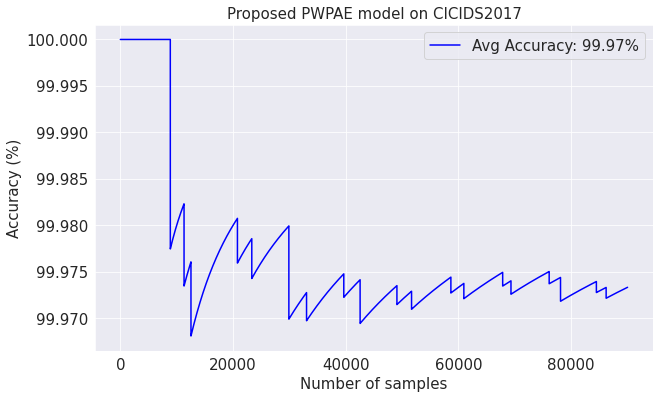

In [ ]:
for i in range(2,len(datasets)):
  dataset ,target ,buffer = read_dataset(datasets[i])
  df = dataset
  X = df.drop([target],axis=1)
  y = df[target]
  X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.1, test_size = 0.9, shuffle=False,random_state = 0)
  
  # Use the Performance Weighted Probability Averaging Ensemble (PWPAE) model 
  name = "Proposed PWPAE model on "
  data_name = datasets[i].split('/')[-1].split(".")[0]
  name = name+data_name
  t, m = PWPAE(X_train, y_train, X_test, y_test) # Learn the model on the dataset
  acc_fig(t, m, name , data_name+' accuracy.svg') # Draw the figure of how the real-time accuracy changes with the number of samples



Accuracy: 86.19%
Precision: 86.61999999999999%
Recall: 74.6%
F1-score: 80.17%
CPU times: user 11min 5s, sys: 2.46 s, total: 11min 8s
Wall time: 11min 12s


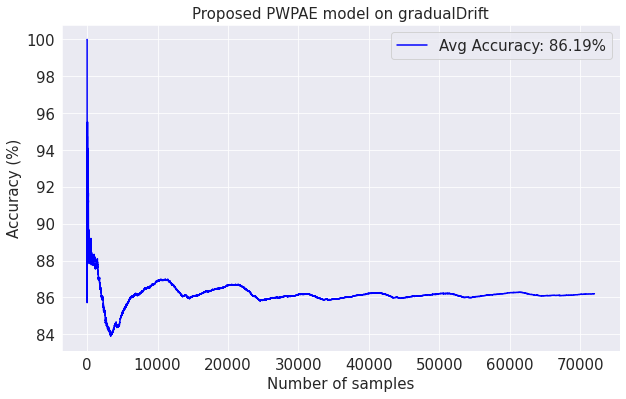

In [ ]:
%%time
# Use the Performance Weighted Probability Averaging Ensemble (PWPAE) model 
name = "Proposed PWPAE model"
data_name = ' on gradualDrift'
name = name+data_name
t, m = PWPAE(X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples

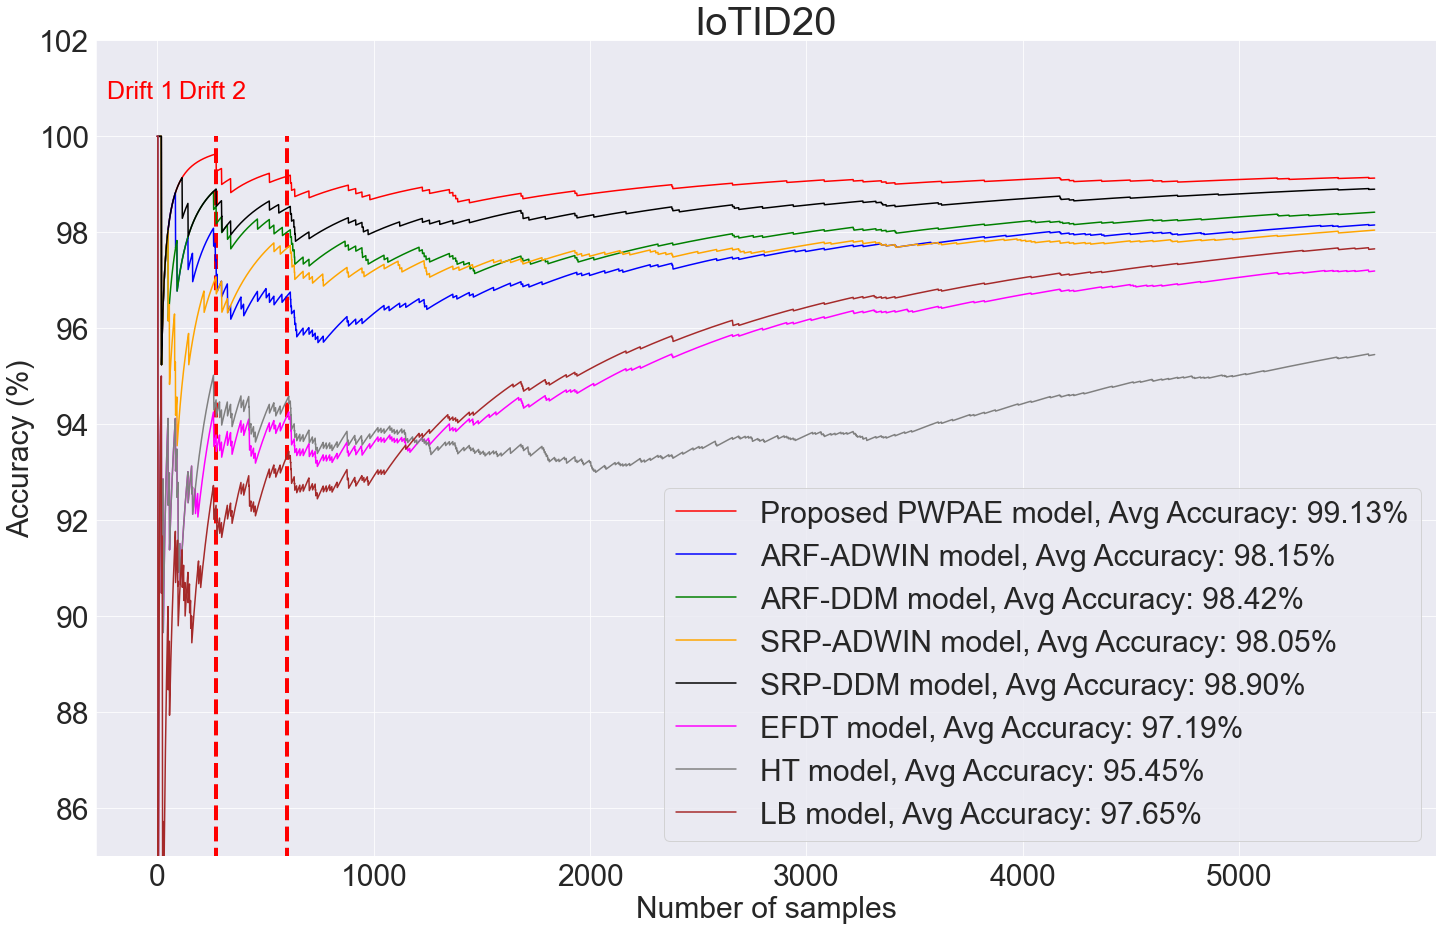

In [ ]:
# Draw a comprehensive figure to compare the performance of all models
plt.rcParams.update({'font.size': 30})
plt.figure(1,figsize=(24,15)) 
sns.set_style("darkgrid")
plt.clf() 

# Plot the accuracy change of each learner
plt.plot(t,m,'-r',label=name+', Avg Accuracy: %.2f%%'%(m[-1]))
plt.plot(t,m1,'-b',label=name1+', Avg Accuracy: %.2f%%'%(m1[-1]))
plt.plot(t,m2,'-g',label=name2+', Avg Accuracy: %.2f%%'%(m2[-1]))
plt.plot(t,m3,'orange',label=name3+', Avg Accuracy: %.2f%%'%(m3[-1]))
plt.plot(t,m4,'black',label=name4+', Avg Accuracy: %.2f%%'%(m4[-1]))
plt.plot(t,m5,'magenta',label=name5+', Avg Accuracy: %.2f%%'%(m5[-1]))
plt.plot(t,m6,'grey',label=name6+', Avg Accuracy: %.2f%%'%(m6[-1]))
plt.plot(t,m7,'brown',label=name7+', Avg Accuracy: %.2f%%'%(m7[-1]))

# Draw the drift points/time
dr = [0,270,600]
for i in range(len(dr)):
    if i!=0:
        plt.text(dr[i]-500, 100.8, 'Drift '+str(i), c = "red", fontsize = 25)
        plt.vlines(dr[i], 0, 100, colors = "red", linewidth=4, linestyles = "dashed")
        
plt.legend(loc='lower right')
plt.ylim(85, 102)
plt.title('IoTID20', fontsize=40)
plt.xlabel('Number of samples')
plt.ylabel('Accuracy (%)')

plt.draw()